### 1. Importing the Libraries

In [94]:
import pandas as pd

### 2. Importing the Dataset

In [95]:
data = pd.read_csv('heart.csv')

### 3. Taking Care of Missing Values

In [96]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [97]:
data_dup = data.duplicated().any()

In [98]:
data_dup

True

In [99]:
data = data.drop_duplicates()

In [100]:
data_dup = data.duplicated().any()

In [101]:
data_dup

False

### 5. Data Processing

In [102]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [103]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [104]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [105]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [106]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [107]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [108]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### 7. Feature Scaling

In [109]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [112]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [113]:
X = data.drop('target',axis=1)

In [114]:
y = data['target']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [117]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [118]:
print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 241 samples
Testing set has 61 samples


## 9. Linear ML Algorithms

In [120]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [123]:
y_pred1 = log.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

### SVC

In [126]:
from sklearn import svm

In [127]:
svm = svm.SVC()

In [128]:
svm.fit(X_train,y_train)

SVC()

In [129]:
y_pred2 = svm.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

### KNeighbors Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier()

In [133]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [134]:
y_pred3=knn.predict(X_test)

In [135]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [136]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [137]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [138]:
import matplotlib.pyplot as plt

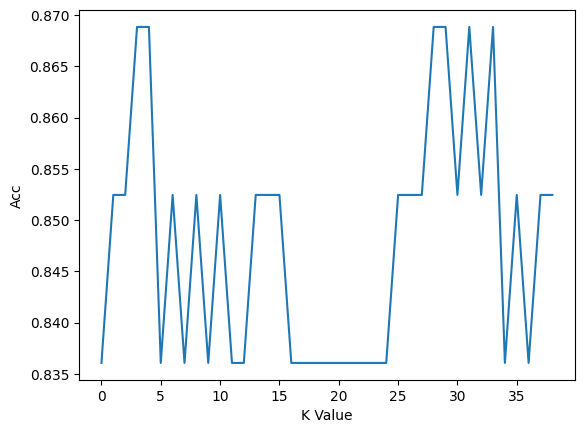

In [139]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [140]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

### Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
nb = GaussianNB()

In [143]:
nb.fit(X_train,y_train)

GaussianNB()

In [144]:
y_pred7 = nb.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred7)

0.8524590163934426

## Non-Linear ML Algorithms

In [146]:
data = pd.read_csv('heart.csv')

In [147]:
data = data.drop_duplicates()

In [148]:
X = data.drop('target',axis=1)
y=data['target']

In [149]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dt = DecisionTreeClassifier()

In [152]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [153]:
y_pred4= dt.predict(X_test)

In [154]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

### 13. Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf = RandomForestClassifier()

In [157]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
y_pred5= rf.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### 14. Gradient Boosting Classifier

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gbc = GradientBoostingClassifier()

In [162]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [163]:
y_pred6 = gbc.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

### Ensembling

In [165]:
from mlxtend.classifier import StackingCVClassifier

In [166]:
scv = StackingCVClassifier(classifiers=[knn,nb,dt,rf,gbc],meta_classifier=log)

In [167]:
scv.fit(X_train,y_train)

StackingCVClassifier(classifiers=[KNeighborsClassifier(n_neighbors=2),
                                  GaussianNB(), DecisionTreeClassifier(),
                                  RandomForestClassifier(),
                                  GradientBoostingClassifier()],
                     meta_classifier=LogisticRegression(max_iter=10000))

In [168]:
y_pred8 = scv.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred8)

0.9016393442622951

In [170]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB','NB','ENS'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100,
                                accuracy_score(y_test,y_pred7)*100,
                                accuracy_score(y_test,y_pred8)*100,]})

In [171]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,77.049180
4,RF,85.245902
5,GB,85.245902
6,NB,85.245902
7,ENS,90.163934


In [172]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

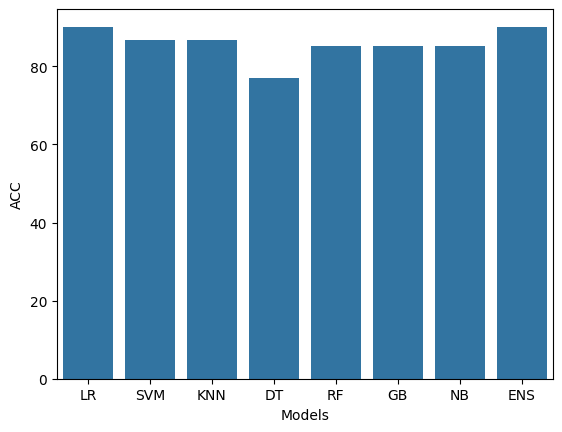

In [173]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [174]:
X=data.drop('target',axis=1)
y=data['target']

In [175]:
scv = StackingCVClassifier(classifiers=[knn,nb,dt,rf,gbc],meta_classifier=nb)
scv.fit(X,y)

StackingCVClassifier(classifiers=[KNeighborsClassifier(n_neighbors=2),
                                  GaussianNB(), DecisionTreeClassifier(),
                                  RandomForestClassifier(),
                                  GradientBoostingClassifier()],
                     meta_classifier=GaussianNB())

### 15. Prediction on New Data

In [176]:
import pandas as pd

In [177]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [178]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [179]:
p = scv.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [180]:
import joblib

In [181]:
joblib.dump(scv,'model_joblib_heart')

['model_joblib_heart']

In [182]:
model = joblib.load('model_joblib_heart')

In [183]:
model.predict(new_data)

array([0], dtype=int64)

In [184]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### GUI

In [185]:
from tkinter import *
import joblib

In [186]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()